In [1]:
# import libraries need for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# create file path
file_path = 'https://raw.githubusercontent.com/arvioa/bank_customer_churn_prediction/main/assets/Customer-Churn-Transformed.csv'

# import csv file
df = pd.read_csv(file_path,sep=";")

# take a brief overview of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned,Age_segment,CreditScore_segment,Salary_segment
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1,101348.88,1,1,2,DIAMOND,464,40-49,Medium,Middle Income
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,1,112542.58,0,1,3,DIAMOND,456,40-49,Medium,Middle Income
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,0,113931.57,1,1,3,DIAMOND,377,40-49,Low,Middle Income
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,93826.63,0,0,5,GOLD,350,30-39,Medium,Middle Income
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,1,79084.10,0,0,5,GOLD,425,40-49,Very High,Middle Income


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RowNumber            10000 non-null  int64  
 1   CustomerId           10000 non-null  int64  
 2   Surname              10000 non-null  object 
 3   CreditScore          10000 non-null  int64  
 4   Geography            10000 non-null  object 
 5   Gender               10000 non-null  object 
 6   Age                  10000 non-null  int64  
 7   Tenure               10000 non-null  int64  
 8   Balance              10000 non-null  float64
 9   NumOfProducts        10000 non-null  int64  
 10  HasCrCard            10000 non-null  int64  
 11  IsActiveMember       10000 non-null  int64  
 12  EstimatedSalary      10000 non-null  float64
 13  Exited               10000 non-null  int64  
 14  Complain             10000 non-null  int64  
 15  SatisfactionScore    10000 non-null  

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,PointEarned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [5]:
df.isna().sum()

RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
Complain               0
SatisfactionScore      0
CardType               0
PointEarned            0
Age_segment            0
CreditScore_segment    0
Salary_segment         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
count = df['Exited'].value_counts()

In [8]:
churn = count[1] 
not_churn = count[0]

In [9]:
print("Churn :", count[1],"\nNot churn:",count[0])

Churn : 2038 
Not churn: 7962


# Data Preparation

In [10]:
def add_labels(data,feature,ax):
    total=(len(data))
    bars_plot=ax.patches
    for bars in bars_plot:
        percent = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()-5
        ax.text(x, y,(percent,bars.get_height()),ha='center')

In [11]:
# Churn column
df.loc[df['Exited'] == 1, 'Exited'] = 'Churned'
df.loc[df['Exited'] == 0, 'Exited'] = 'Not Churned'

# IsActiveMember
df.loc[df['IsActiveMember'] == 1, 'IsActiveMember'] = 'Active'
df.loc[df['IsActiveMember'] == 0, 'IsActiveMember'] = 'Inactive'

# Complain
df.loc[df['Complain'] == 1, 'Complain'] = 'Complained'
df.loc[df['Complain'] == 0, 'Complain'] = 'No Complain'

In [12]:
#Encodes DataType
df['Geography'] = df['Geography'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes
df['NumOfProducts'] = df['NumOfProducts'].astype('category').cat.codes
df['HasCrCard'] = df['HasCrCard'].astype('category').cat.codes
df['IsActiveMember'] = df['IsActiveMember'].astype('category').cat.codes
df['Exited'] = df['Exited'].astype('category').cat.codes
df['Complain'] = df['Complain'].astype('category').cat.codes
df['CardType'] = df['CardType'].astype('category').cat.codes
df['Age_segment'] = df['Age_segment'].astype('category').cat.codes
df['CreditScore_segment'] = df['CreditScore_segment'].astype('category').cat.codes
df['Salary_segment'] = df['Salary_segment'].astype('category').cat.codes

# Numerical Columns Distributions

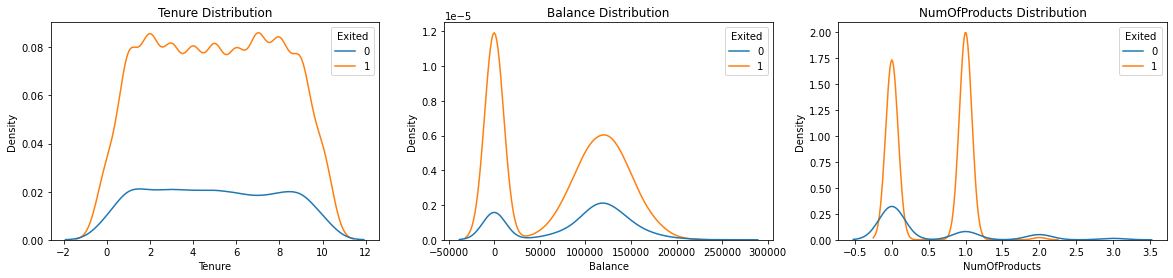

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
sns.kdeplot(x=df['Tenure'], ax=ax[0], hue=df['Exited'])
ax[0].set_title("Tenure Distribution")
sns.kdeplot(x=df['Balance'], hue=df['Exited'], ax=ax[1])
ax[1].set_title("Balance Distribution")
sns.kdeplot(x=df['NumOfProducts'], hue=df['Exited'], ax=ax[2])
ax[2].set_title("NumOfProducts Distribution")

plt.show()

1. The Tenure density distribution is randomly distributed.
2. The Balance density distribution is concentrated on customers with balance from -25000 to 230000.
3. The NumOfProducts density distribution are mainly distributed on 1 and 2 products, with more churned customers condensed from 0.5 to 1.5 number of products.

Few takeaways:
- The highest number of customers who churned purchased 0.5 to 1.5 products from the bank.
- The highest number of customers who churned has balance in their credit card ranging between 45000-210000.

# Categorical Features Distributions

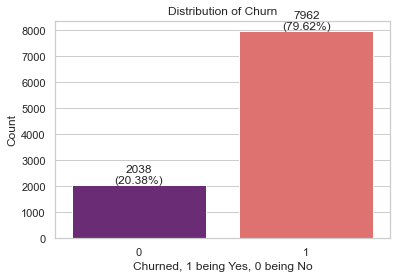

In [14]:
# Create countplot to understand distribution
sns.set(style="whitegrid")
ax = sns.countplot(x=df['Exited'], palette="magma")
plt.xlabel('Churned, 1 being Yes, 0 being No')
plt.ylabel('Count')
plt.title('Distribution of Churn')
# Calculate churn count and percentage
total_count = len(df)
churn_count = df['Exited'].sum()
churn_percentage = (churn_count / total_count) * 100

# Add count and percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}\n({(height / total_count * 100):.2f}%)', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.show()

There are 20.38% of customers who churned from the Bank, This is quite a small amount.

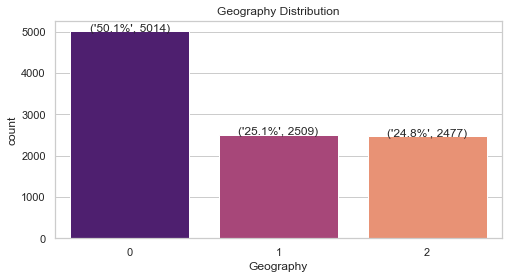

In [15]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x = df['Geography'],palette="magma")
add_labels(df, 'Geography', ax)
plt.title("Geography Distribution")
plt.show()

Most of the customers are from france which took half proportion of the distribution, followed by Spain and Germany with distributions around 25%.

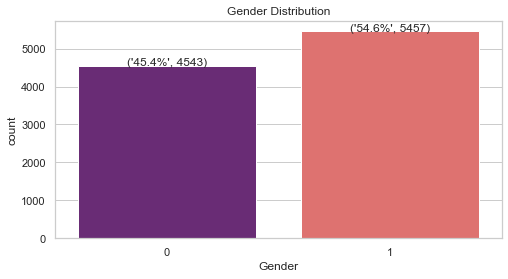

In [16]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x = df['Gender'],palette="magma")
add_labels(df, 'Gender',ax)
plt.title("Gender Distribution")
plt.show()

There are more portion of males compared to females in the customer gender distribution. Males are comprised of 54.6% of the population, while females taking 45.4% of the distribution.

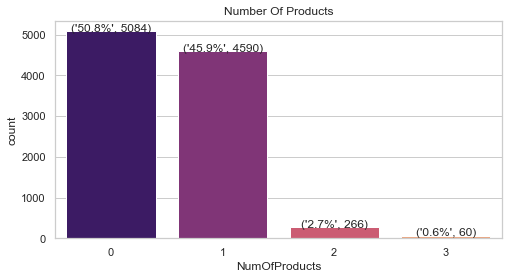

In [17]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x = df['NumOfProducts'],palette="magma")
add_labels(df, 'NumOfProducts',ax)
plt.title("Number Of Products")
plt.show()

The plot suggests that the majority of customers purchased only 1 or 2 products from the bank.

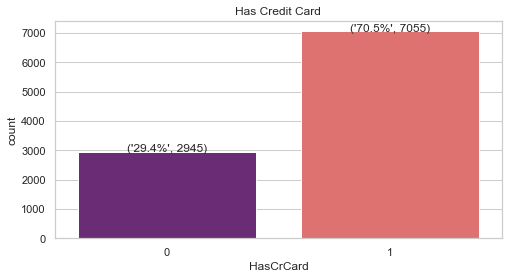

In [18]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x = df['HasCrCard'],palette="magma")
add_labels(df, 'HasCrCard',ax)
plt.title("Has Credit Card")
plt.show()

We can see that 70.5% of customers possess a credit card from the bank. This is a fairly big gap between the two classification.

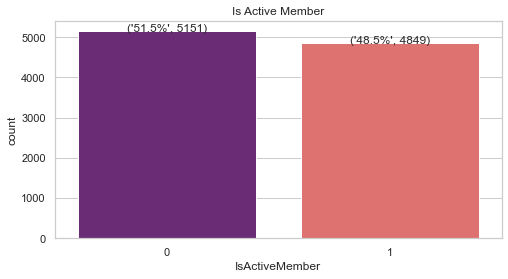

In [19]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x = df['IsActiveMember'],palette="magma")
add_labels(df, 'IsActiveMember',ax)
plt.title("Is Active Member")
plt.show()

The active member distribution shows no significant difference between the active and inactive members of the bank.

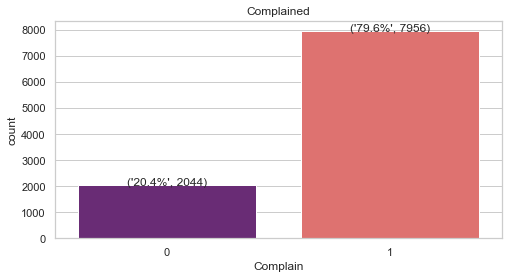

In [20]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x = df['Complain'],palette="magma")
add_labels(df, 'Complain',ax)
plt.title("Complained")
plt.show()

The number of complained customers has a smaller proportion of the distribution compared to customers who dont complain, indicating its relatively lower occurrence in the dataset. Despite of it, there could still be insights to be gathered from this column, so we would keep this feature moving forward.

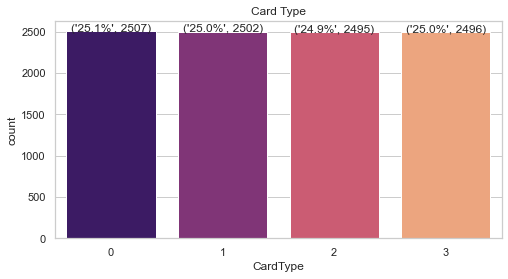

In [21]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x = df['CardType'],palette="magma")
add_labels(df, 'CardType',ax)
plt.title("Card Type")
plt.show()

The distribution shows no substantial variance among customers with card type of diamond, gold, silver, nor platinum.

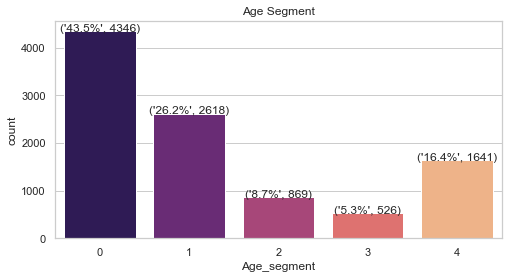

In [22]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x = df['Age_segment'],palette="magma")
add_labels(df, 'Age_segment',ax)
plt.title("Age Segment")
plt.show()

From the countplot, the distribution of age is segmented around the age group of 30-49 years old.

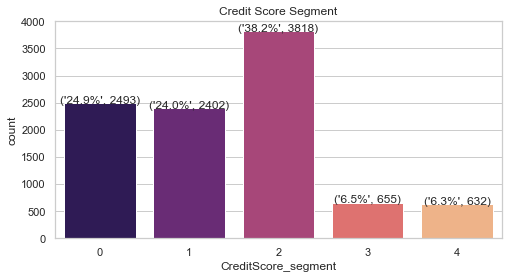

In [23]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x = df['CreditScore_segment'],palette="magma")
add_labels(df, 'CreditScore_segment',ax)
plt.title("Credit Score Segment")
plt.show()

Most customers' credit scores are segmented in the range from Low to High, with the smallest distribution of customers observed at both ends of the spectrum.

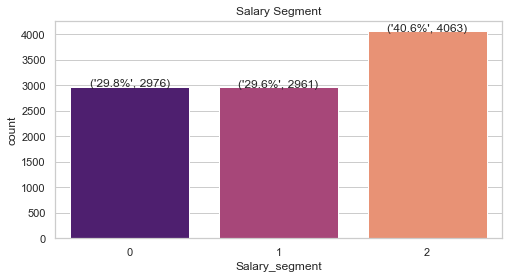

In [24]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x = df['Salary_segment'],palette="magma")
add_labels(df, 'Salary_segment',ax)
plt.title("Salary Segment")
plt.show()

We can see that the majority of our data points belong to the middle income category, with the remaining data evenly divided between the other two categories.

In [25]:
numerical_columns = ['Tenure', 'Balance', 'PointEarned','SatisfactionScore','EstimatedSalary','CreditScore']
categorical_columns = ['Geography','Gender','HasCrCard','IsActiveMember','Complain','CardType','Age_segment'
                       ,'CreditScore_segment','Salary_segment']

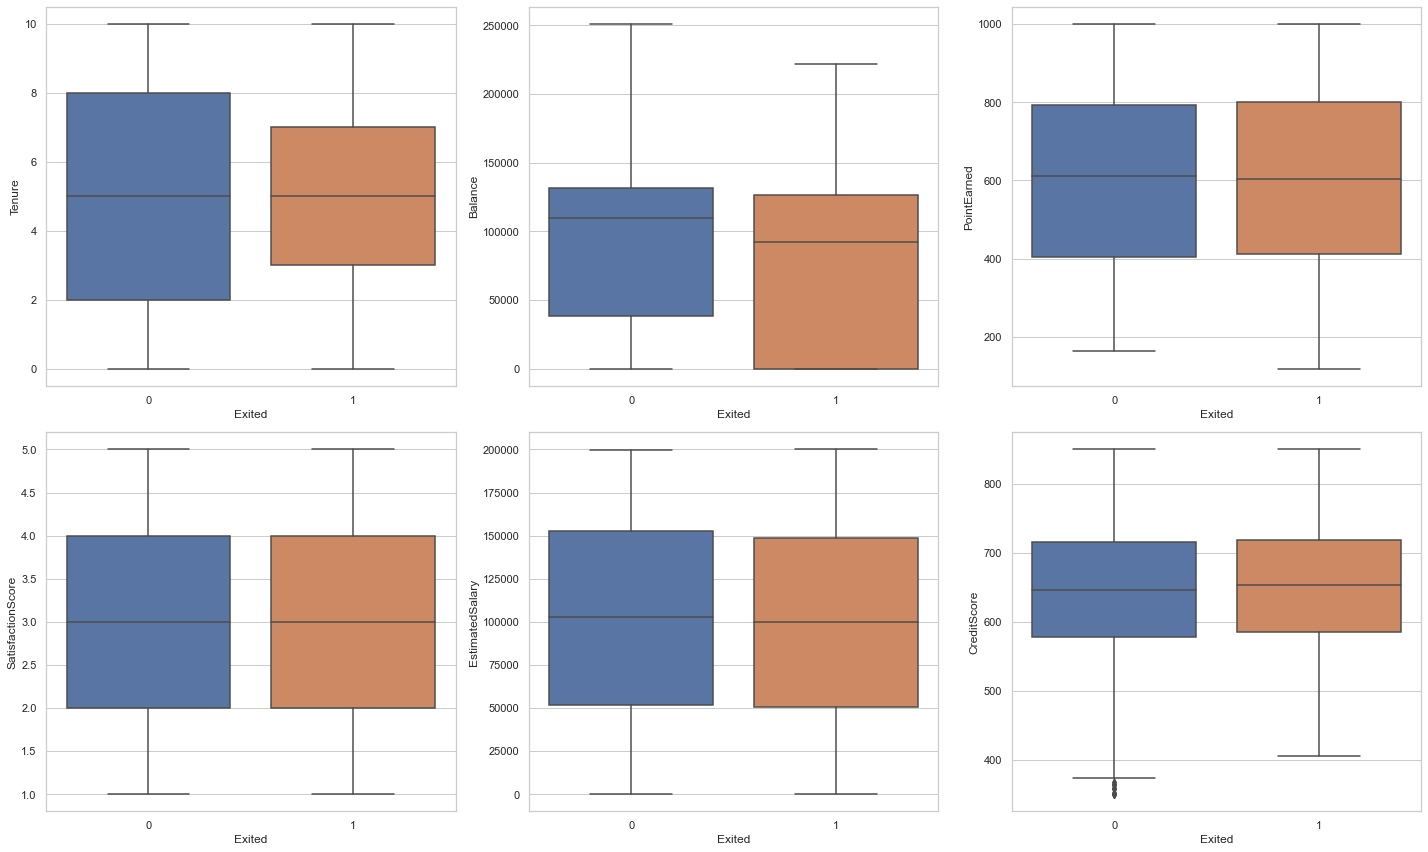

In [26]:
# Set up the figure and axes
plt.figure(figsize=(20, 12))

# Iterate through each column and create grouped box plots side by side
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns layout for 6 features
    sns.boxplot(x="Exited", y=col, data=df)
    plt.xlabel('Exited')
    plt.ylabel(col)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [27]:
# Calculate Q1, Q3, and IQR
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower bound
lower_bound = Q1 - 1.5 * IQR

print("Lower Bound (Bottom Threshold) of the CreditScore Box Plot:", lower_bound)

Lower Bound (Bottom Threshold) of the CreditScore Box Plot: 383.0


In [28]:
outlier = df[df['CreditScore'] < 383]
outlier['Exited'].value_counts()

0    15
Name: Exited, dtype: int64

There seems to be few outliers in the CreditScore column, we will drop these outliers in the preprocessing step.

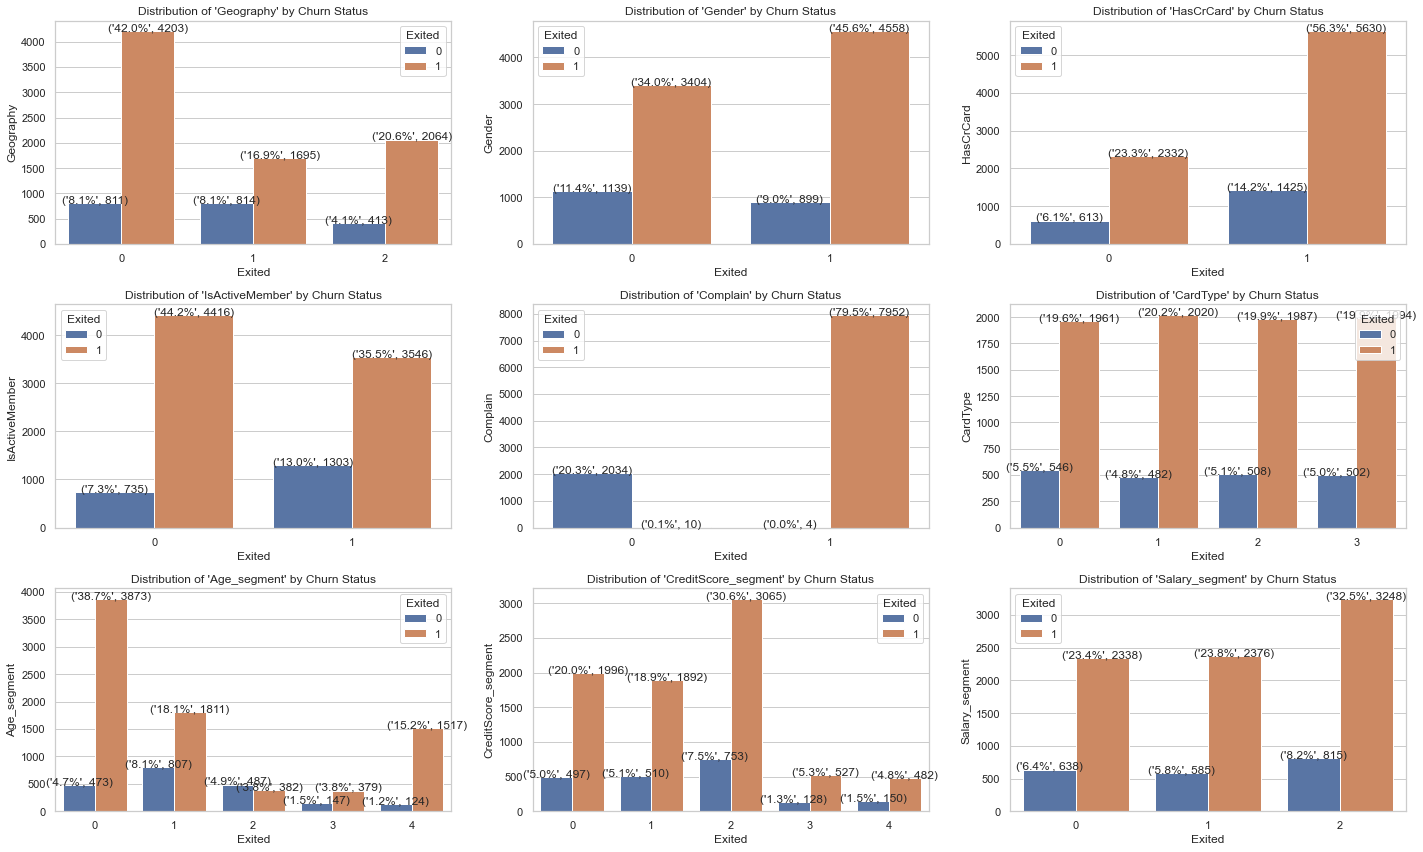

In [29]:
# Set up the figure and axes
plt.figure(figsize=(20, 12))

# Iterate through each column and create grouped box plots side by side
for i, col in enumerate(categorical_columns, start=1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns layout for 6 features
    ax = sns.countplot(data=df, x=col, hue='Exited')
    add_labels(df, col,ax)
    plt.title(f"Distribution of '{col}' by Churn Status")
    plt.xlabel('Exited')
    plt.ylabel(col)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

'The explanation moves horizontally then vertically starting from leftmost plots'
- Customers from France and Germany are more likely to churn with equal percentages around 8.1%, with a greater margin by 4% than Spain.
- Females have more distribution of churned customers than males, with margin gap of 2.4%.
- We can see that there is a fair gap of 8.1% between members who have credit card and those who dont with the churn distribution percentage.
- There is a close gap of 4.7% between inactive and active members of the bank in relation to churned customers.
- The 'Complain' plot indicates that customers who complained to the bank were more likely to churn compared to those who did not., with a huge gap of 20.3% from the total distribution.
- There are no significant relationship in the CardType plot
- In the 'Age_segment' plot, the highest customer churn ratio is observed in the age group of 30-59, while people under the age of 30 and those over 60 tend not to churn.
- We can see that customers with credit scores ranging from low to high are more evenly distributed in terms of churn.
- Customers with a middle income have the highest churn ratio compared to others.

# Correlation 

We would now proceed by checking statistical correlation significance.

First, revert the Exited columns to its numerical original values.

In [30]:
df.loc[df['Exited'] == 'Churned', 'Exited'] = 1
df.loc[df['Exited'] == 'Not Churned', 'Exited'] = 0

<AxesSubplot:>

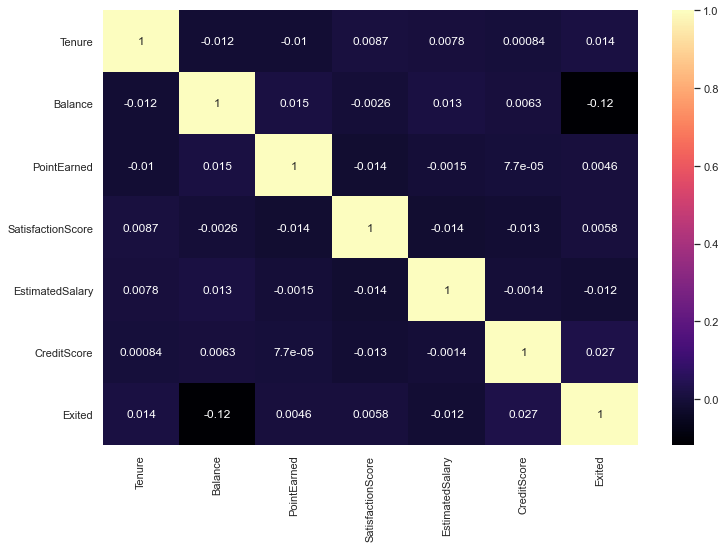

In [31]:
numerical_columns = ['Tenure', 'Balance', 'PointEarned','SatisfactionScore','EstimatedSalary','CreditScore','Exited']
plt.figure(figsize=(12,8))
numeric_df = df[numerical_columns]
sns.heatmap(numeric_df.corr(), cmap = 'magma', annot = True)

Now, we check for correlation significance between the categorical columns to target, Exited.

In [32]:
# Function to perform Kruskal-Wallis test for a categorical variable
def perform_kruskal_wallis(var):
    groups = [df[df['Exited'] == 0][var], df[df['Exited'] == 1][var]]
    statistic, p_value = kruskal(*groups)
    return p_value

# Perform Kruskal-Wallis test for each categorical variable
kruskal_wallis_results = {var: perform_kruskal_wallis(var) for var in categorical_columns}

# Print Kruskal-Wallis test results
for var, p_value in kruskal_wallis_results.items():
    print(f"Kruskal-Wallis Test p-value for '{var}': {p_value:.4f}")


Kruskal-Wallis Test p-value for 'Geography': 0.0000
Kruskal-Wallis Test p-value for 'Gender': 0.0000
Kruskal-Wallis Test p-value for 'HasCrCard': 0.4854
Kruskal-Wallis Test p-value for 'IsActiveMember': 0.0000
Kruskal-Wallis Test p-value for 'Complain': 0.0000
Kruskal-Wallis Test p-value for 'CardType': 0.2769
Kruskal-Wallis Test p-value for 'Age_segment': 0.0000
Kruskal-Wallis Test p-value for 'CreditScore_segment': 0.6749
Kruskal-Wallis Test p-value for 'Salary_segment': 0.2019


The columns complain, age_segment, Geography, IsActiveMember, Gender has high correlation with column Exited. 

In [37]:
# Retrieve the categorical columns needed
categorical_columns = ['Geography','Gender','HasCrCard','IsActiveMember','Complain','CardType','Age_segment'
                       ,'CreditScore_segment','Salary_segment','Exited']

In [38]:
def cramer_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

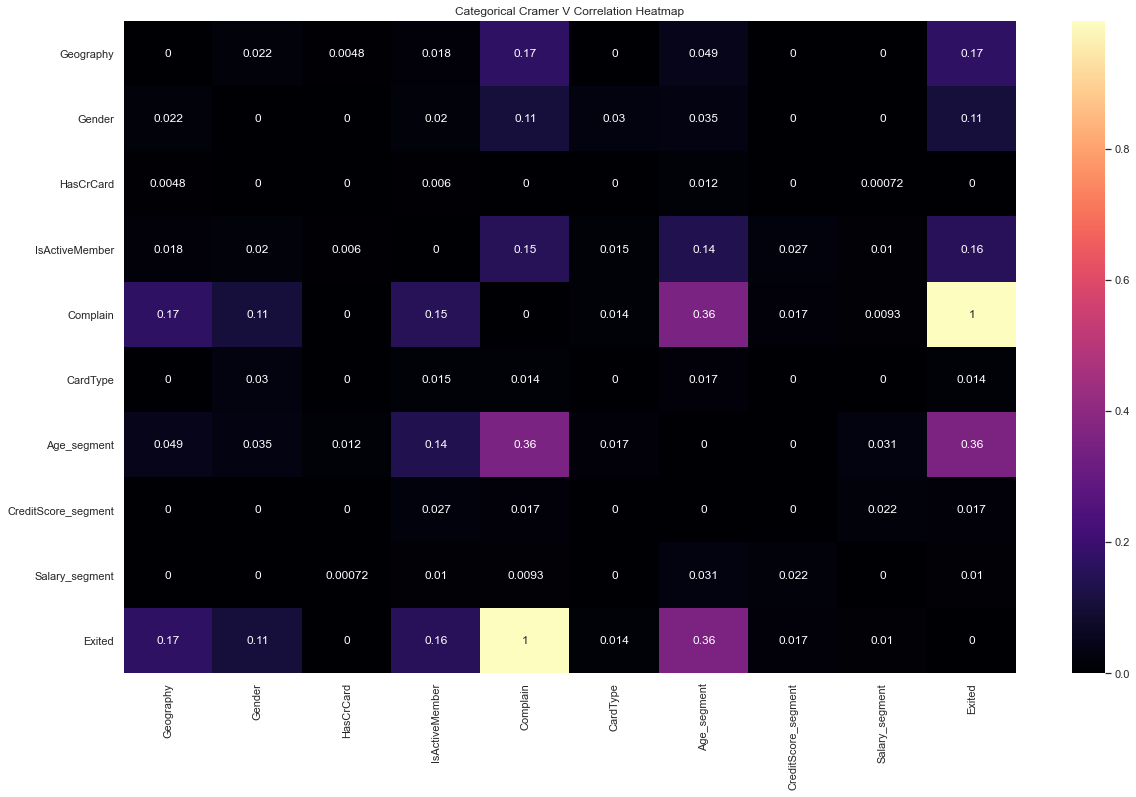

In [39]:
corr_matrix = np.zeros((len(categorical_columns),len(categorical_columns)))
"""Calculates Cramér's V for all unique pairs of categorical columns,
ensuring that the resulting correlation matrix is symmetric. """
for a, b in combinations(categorical_columns, 2):
    id1, id2 = categorical_columns.index(a), categorical_columns.index(b)
    corr_matrix[id1, id2] = cramer_v(pd.crosstab(df[a], df[b]))
    corr_matrix[id2, id1] = corr_matrix[id1, id2]

corr = pd.DataFrame(corr_matrix, index=categorical_columns, columns=categorical_columns)
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(corr, annot=True, ax=ax, cmap="magma"); ax.set_title("Categorical Cramer V Correlation Heatmap");